In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings('ignore')

In [3]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape      #200 examples, 3 features and 1 label

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]                   #No null values in dataset, hence it is clean

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

### Data Visualization

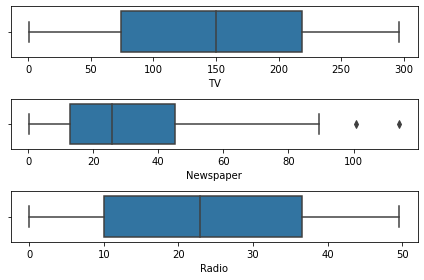

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(3)
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

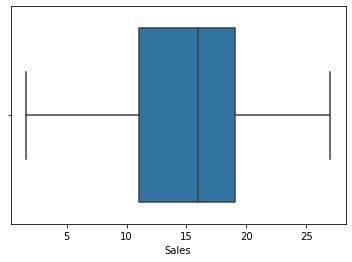

In [9]:
sns.boxplot(advertising['Sales'])               # examining label y
plt.show()

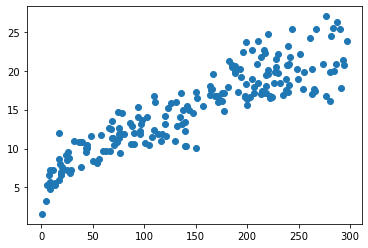

In [10]:
plt.scatter(advertising['TV'], advertising['Sales'])        #to visulaize relation between TV advertising and sales
plt.show()

### Linear Regression

In [11]:
X = advertising['TV']
y = advertising['Sales']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)   #spilting dataset into tranning and test data

In [13]:
import statsmodels.api as sm

In [14]:
X_train_sm = sm.add_constant(X_train)                 # Add constant to find intercept
lr = sm.OLS(y_train, X_train_sm).fit()                   # Fit the resgression line using OLS
lr.params

const    7.160173
TV       0.053385
dtype: float64

In [15]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     616.7
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           9.12e-53
Time:                        12:01:04   Log-Likelihood:                -307.27
No. Observations:                 140   AIC:                             618.5
Df Residuals:                     138   BIC:                             624.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1602      0.367     19.500      0.0

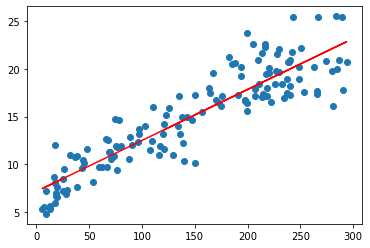

In [16]:
plt.scatter(X_train, y_train)
y_train = 7.160173 + 0.053385*X_train
plt.plot(X_train, y_train , color = 'red')                  #Sales=7.160173+0.053385×TV
plt.show()

### Prediction

In [17]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)
y_pred.head()                         #prediction matrix

40     17.970692
51     12.520055
139    17.031111
197    16.609367
170     9.829437
dtype: float64

In [18]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared*100                                             #to determine r-squared value of the model

79.77593125416168